In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon, dirichlet, beta
from scipy import special
from mpl_toolkits.mplot3d import Axes3D

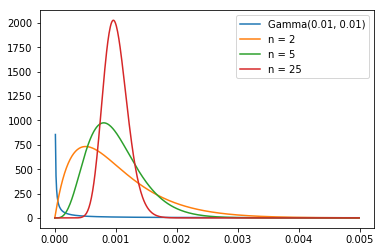

In [2]:
x = np.arange(0, 0.005, 0.00001)
alpha = 0.01
beta = 0.01
mu = 1000 # sample mean from the question

counts = [2, 5, 25] # these are the sample sizes

plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label='Gamma(0.01, 0.01)')

for i in counts:
    plt.plot(x, gamma.pdf(x, a=(alpha + i), scale=1/(beta + mu * i)), label='n = ' + str(i))

plt.legend()
plt.show()

In [3]:
def calculate_posterior(n, mean, x, alpha= 0.001, beta=0.001):
    return ((alpha + n) * np.power((beta + mean * n), (alpha + n))) / (np.power((x + beta + mean * n), (alpha + n + 1)))

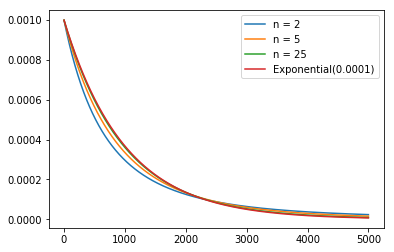

In [4]:
n = 5000
seq = np.arange(1, n)

for i in counts:
    plt.plot(seq, [calculate_posterior(i, mu, y) for y in seq], label='n = ' + str(i))


plt.plot(seq, 0.001 * np.exp(-0.001 * seq), label='Exponential(0.0001)')
plt.legend()
plt.show()


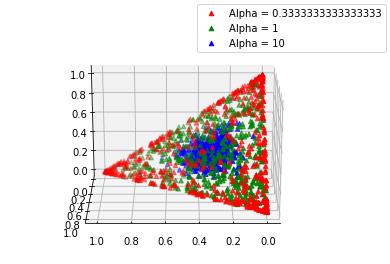

In [5]:
alphas = [
    [1/3, 1/3, 1/3,],
    [1, 1, 1,],
    [10, 10, 10]
]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(20, 90)
cols = ['red', 'green', 'blue']

for a, c in zip(alphas, cols):
    vals = np.random.dirichlet(a, 500)
    ax.scatter(vals[:,0], vals[:,1], vals[:,2], marker='^', c=c, label='Alpha = ' + str(a[0]))
    
fig.legend()
plt.show()


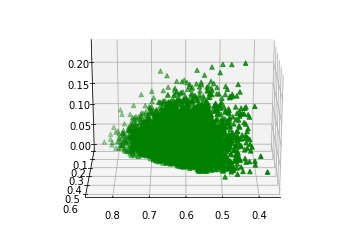

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.view_init(20, 90)
cols = ['red', 'green', 'blue']

vals = np.random.dirichlet([31, 16, 3], 5000)
ax.scatter(vals[:,0], vals[:,1], vals[:,2], marker='^', c='green')
    
plt.show()